# AirBnb in London during pandemic

https://medium.com/analytics-vidhya/what-do-airbnb-listings-look-like-during-pandemic-a52a35504a84

https://github.com/es-g/airbnb_london/blob/master/Data_cleaning_notebook.ipynb

In [55]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw_df = pd.read_csv('06 Nov 2020 listings.csv')

# Data Cleaning

In [56]:

pd.set_option("display.max_columns", raw_df.shape[1]) #display all columns
print(raw_df.shape)
raw_df.head()


(76984, 74)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,2.020110e+13,07/11/2020,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,Not even 10 minutes by metro from Victoria Sta...,https://a0.muscache.com/pictures/b7afccf4-18e5...,43039,https://www.airbnb.com/users/show/43039,Adriano,03/10/2009,"London, England, United Kingdom","Hello, I'm a friendly Italian man with a very ...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/47773...,https://a0.muscache.com/im/pictures/user/47773...,Brixton,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"London, United Kingdom",Lambeth,NaN,51.46225,-0.11732,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,3.0,"[""Cable TV"", ""Coffee maker"", ""Carbon monoxide ...",$97.00,7,190,7,28,1125,1125,8.4,1125.0,NaN,t,0,0,4,279,07/11/2020,192,7,0,21/03/2010,26/03/2020,91.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,t,2,2,0,0,1.48
1,13913,https://www.airbnb.com/rooms/13913,2.020110e+13,07/11/2020,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,Alina,16/11/2009,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a day,83%,71%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Islington, Greater London, United Kingdom",Islington,NaN,51.56802,-0.11121,Private room in apartment,Private room,2,NaN,1 shared bath,1.0,0.0,"[""Cable TV"", ""Bed linens"", ""Coffee maker"", ""Pa...",$40.00,1,29,1,28,29,29,2.8,29.0,NaN,t,30,60,90,365,07/11/2020,21,2,0,18/08/2010,22/02/2020,97.0,10.0,10.0,10.0,10.0,9.0,9.0,NaN,f,2,1,1,0,0.17
2,15400,https://www.airbnb.com/rooms/15400,2.020110e+13,07/11/2020,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,Philippa,05/12/2009,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a day,100%,100%,f,https://a0.muscache.com/im/users/60302/profile...,https://a0.muscache.com/im/users/60302/profile...,Chelsea,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"London, United Kingdom",Kensington and Chelsea,NaN,51.48796,-0.16898,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Cable TV"", ""Coffee maker"", ""Dryer"", ""Dishes ...",$75.00,10,50,10,28,50,50,11.2,50.0,NaN,t,0,20,50,150,07/11/20

# Visualise missing data using heatmap

<AxesSubplot:>

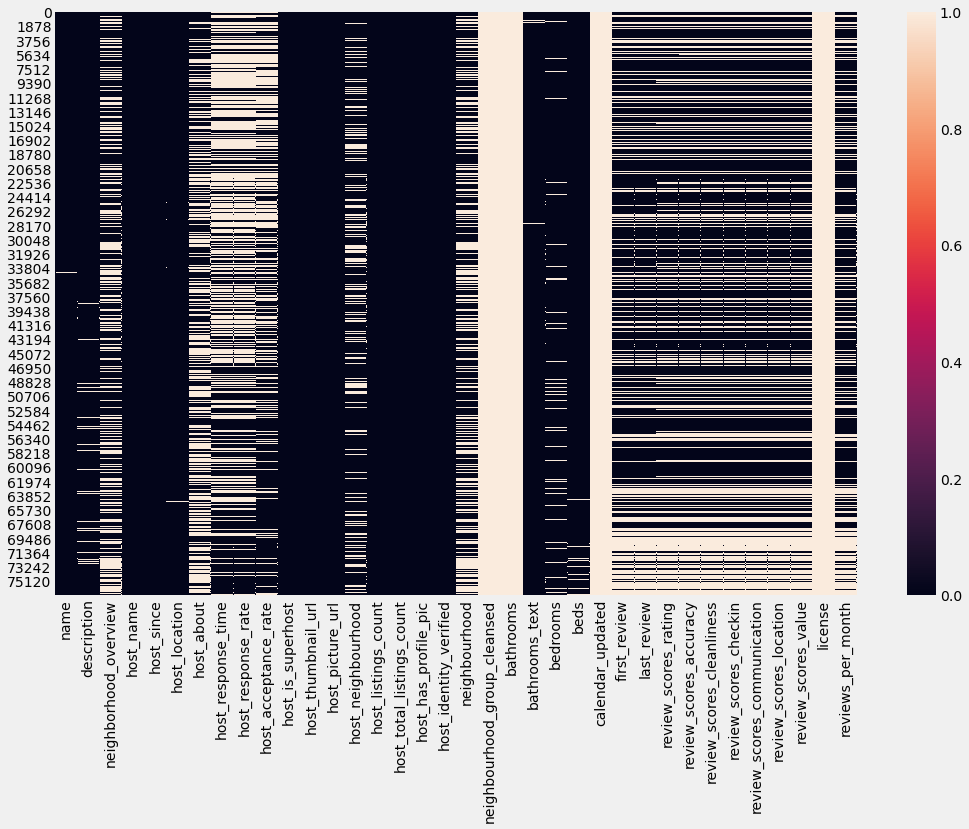

In [57]:
missing_val_cols = raw_df.columns[raw_df.isnull().sum() > 0]
fig, ax = plt.subplots(figsize=(16,10)) 
sns.heatmap(raw_df[missing_val_cols].isnull(), cbar=True)

# Dropping initial columns
Natural Language Processing will not be used for price prediction (of course, this is something to consider, but is out of scope in this case). Hence, free text columns will be dropped. The plot above illustrates that we have columns where most of the values are missing. We will drop these columns as well. We will also be dropping the columns related to scraping of this dataset.

In [58]:
to_drop = ['listing_url', 'scrape_id', 'name', 'description', 'neighborhood_overview', 'picture_url',
              'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 
               'host_verifications', 'neighbourhood', 'neighbourhood_group_cleansed',
               'bathrooms', 'calendar_updated', 'calendar_last_scraped', 'license', 'host_picture_url', 
               'host_neighbourhood', 'host_response_time'
              ]

listings = raw_df.drop(to_drop, axis=1)

In [59]:
listings.isna().sum().sort_values(ascending=False)

host_response_rate                              37618
host_acceptance_rate                            28432
review_scores_checkin                           23603
review_scores_value                             23602
review_scores_location                          23601
review_scores_accuracy                          23555
review_scores_communication                     23552
review_scores_cleanliness                       23545
review_scores_rating                            23490
first_review                                    21733
last_review                                     21733
reviews_per_month                               21733
bedrooms                                         4746
beds                                             1080
bathrooms_text                                    160
host_total_listings_count                          11
host_identity_verified                             11
host_has_profile_pic                               11
host_listings_count         

# Minimum and maximum nights columns
We can see that there are multiple columns for minimum and maximum night stays, but we'll only be using two main ones - minimum_nights and maximum_nights. Multiple columns are presumably due to the fact that minimum or maximum stays vary throughout the year. These columns mostly match the 'default' minimum_nights / maximum_nights columns, so we will drop them.

In [60]:
print(sum(listings.maximum_nights_avg_ntm == listings.maximum_nights) / len(listings)) 
print(sum(listings.maximum_maximum_nights == listings.maximum_nights) / len(listings))

0.8678946274550556
0.8777797983996675


In [61]:
listings = listings.drop(['maximum_nights_avg_ntm', 'minimum_minimum_nights', 'minimum_maximum_nights',
                          'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
                          'minimum_nights_avg_ntm'], axis=1)

Let's check if boolean and numeric columns have enough varibility to make them worth including

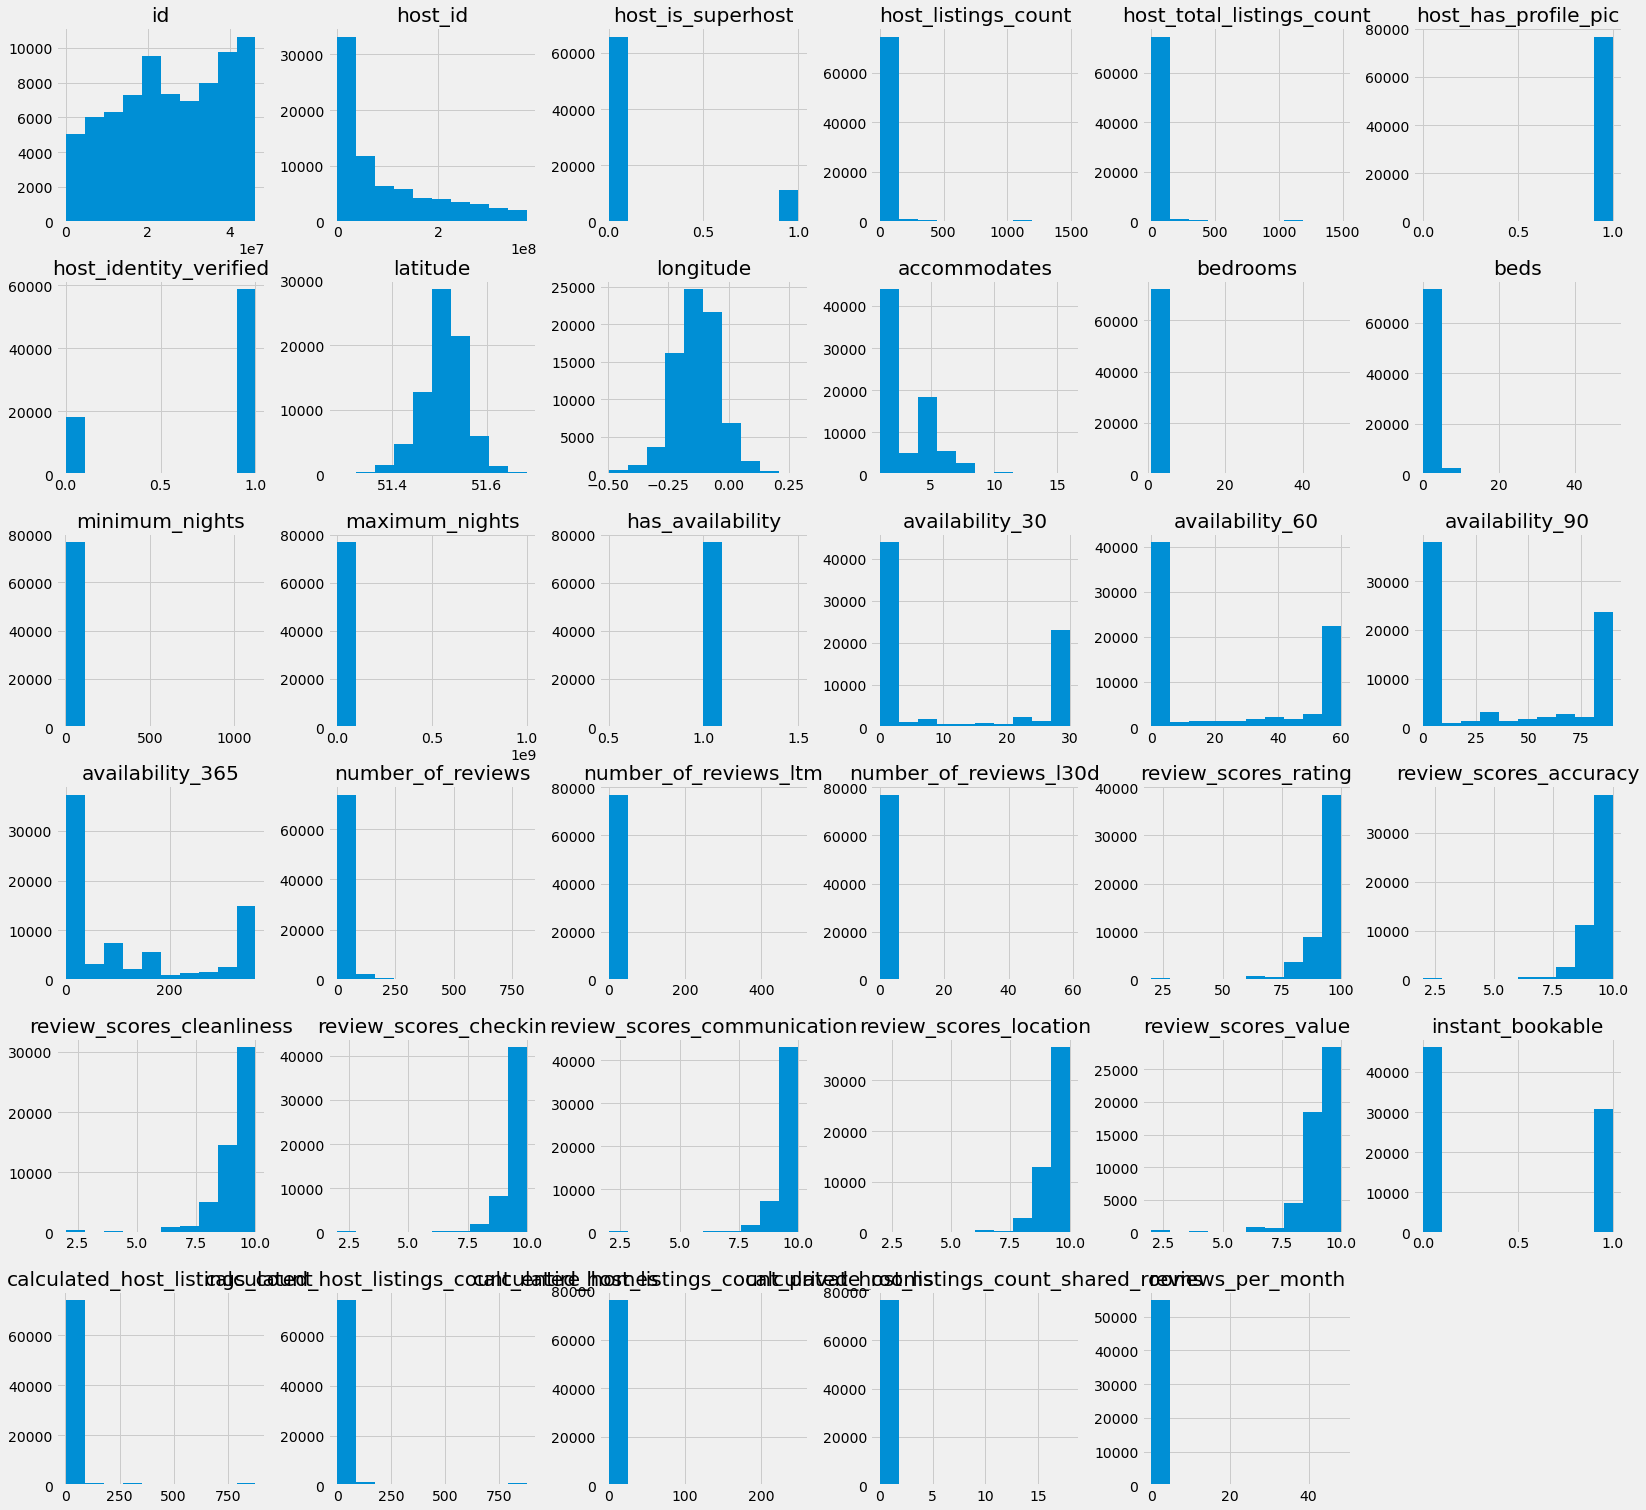

In [62]:
# Replace columns with categorical values t and f with 1 and 0
listings = listings.replace({'f': 0, 't': 1})

# Plot the histogram of numerical and boolean columns
listings.hist(figsize=(25, 25));

From the above, it can be seen that Column has_availability contains only one category There is very little variability in calculated_host_listings_count_shared_rooms columns So we will be dropping these columns

In [63]:
listings = listings.drop(['has_availability', 'calculated_host_listings_count_shared_rooms'], axis=1)

In [64]:
# Lambda function to remove special characters and convert to float
strip_and_convert = lambda col: col.str.extract('(\d+)', expand=False).astype(float, errors='ignore')

# strip_and_convert function wil be applied on the below columns
cols_to_numeric = ['host_response_rate', 'host_acceptance_rate', 'bathrooms_text', 'price']
listings[cols_to_numeric] = listings[cols_to_numeric].apply(strip_and_convert)
# Rename bathrooms_text column
listings = listings.rename(columns={'bathrooms_text': 'bathrooms'})
listings.head()

,id,last_scraped,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,11551,07/11/2020,43039,03/10/2009,100.0,100.0,0.0,3.0,3.0,1.0,1.0,Lambeth,51.46225,-0.11732,Entire apartment,Entire home/apt,4,1.0,1.0,3.0,"[""Cable TV"", ""Coffee maker"", ""Carbon monoxide ...",97.0,7,190,0,0,4,279,192,7,0,21/03/2010,26/03/2020,91.0,9.0,9.0,10.0,10.0,9.0,9.0,1,2,2,0,1.48
1,13913,07/11/2020,54730,16/11/2009,83.0,71.0,0.0,3.0,3.0,1.0,1.0,Islington,51.56802,-0.11121,Private room in apartment,Private room,2,1.0,1.0,0.0,"[""Cable TV"", ""Bed linens"", ""Coffee maker"", ""Pa...",40.0,1,29,30,60,90,365,21,2,0,18/08/2010,22/02/2020,97.0,10.0,10.0,10.0,10.0,9.0,9.0,0,2,1,1,0.17
2,15400,07/11/2020,60302,05/12/2009,100.0,100.0,0.0,1.0,1.0,1.0,1.0,Kensington and Chelsea,51.48796,-0.16898,Entire apartment,Entire home/apt,2,1.0,1.0,1.0,"[""Cable TV"", ""Coffee maker"", ""Dryer"", ""Dishes ...",75.0,10,50,0,20,50,150,89,1,0,21/12/2009,16/03/2020,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1,1,1,0,0.67
3,17402,06/11/2020,67564,04/01/2010,67.0,100.0,1.0,18.0,18.0,1.0,1.0,Westminster,51.52195,-0.14094,Entire apartment,Entire home/apt,6,2.0,3.0,3.0,"[""Bed linens"", ""Coffee maker"", ""Dryer"", ""Paid ...",307.0,4,365,25,55,85,330,42,0,0,21/03/2011,02/11/2019,94.0,10.0,9.0,9.0,9.0,10.0,9.0,0,15,15,0,0.36
4,17506,07/11/2020,67915,05/01/2010,NaN,NaN,0.0,3.0,3.0,1.0,1.0,Hammersmith and Fulham,51.47935,-0.19743,Private room in bed and breakfast,Private room,2,1.0,1.0,1.0,"[""TV"", ""Heating"", ""Shower gel"", ""Wifi"", ""Smoke...",150.0,3,21,29,59,89,364,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,0,2,NaN


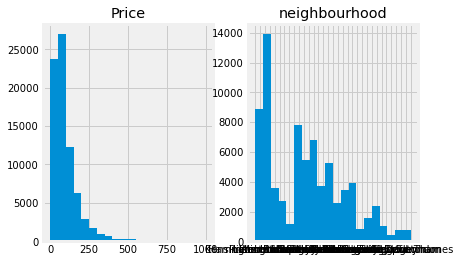

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

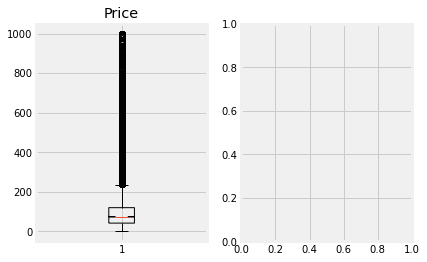

In [67]:
%matplotlib inline
# Show histograms
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(listings['price'], 20)
ax1.set_title('Price')
ax2.hist(listings['neighbourhood_cleansed'], 20)
ax2.set_title('neighbourhood')
plt.show()

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(listings['price'], 20)
ax1.set_title('Price')
ax2.boxplot(listings['neighbourhood_cleansed'], 20)
ax2.set_title('neighbourhood')
plt.show()


# Show scatterplots (for joint distributions)
plt.xlabel('price')
plt.suptitle('Price vs. Mileage')
plt.ylabel('mileage')
# setting the points to be slightly transparent to better appreciate density
plt.scatter(listings['price'], listings['neighbourhood_cleansed'] , linewidth = 0, c="#00000055")

In [108]:
%matplotlib
plt.hist(listings['price'], 20)
plt.title('Price')
plt.show()


Using matplotlib backend: Qt5Agg


In [84]:
listings.neighbourhood_cleansed.describe()

count           76984
unique             33
top       Westminster
freq             8576
Name: neighbourhood_cleansed, dtype: object

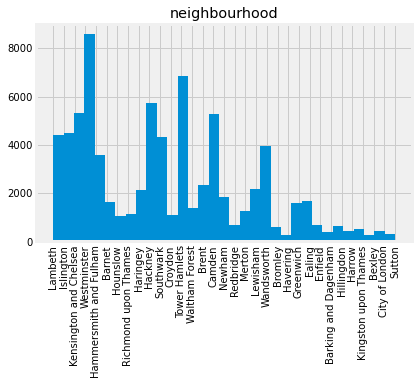

In [85]:
%matplotlib inline
plt.hist(listings['neighbourhood_cleansed'], 33)
plt.title('neighbourhood')
plt.xticks(rotation=90)
plt.show()

In [109]:
#%matplotlib inline

plt.xlabel('price')
plt.suptitle('Price vs. Neighbourhood')
plt.ylabel('neighbourhood')
# setting the points to be slightly transparent to better appreciate density
plt.scatter(listings['price'], listings['neighbourhood_cleansed'] , linewidth = 0, c="#00000055")

# Analysis:

From the most of the more expensive listings fall in the Westminister and Kensington and Chelsea neighbour. If we cut off at 400, it may not be telling the story... cutting off at 800 will be better.

need to re- consider

In [113]:
meanPrice = listings['price'].mean()
stdDevPrice = listings['price'].std()
print(meanPrice)
print(stdDevPrice)
print(6 *stdDevPrice)

outliers = abs(listings['price'] - meanPrice) > 6 * stdDevPrice

outliers.sum()

#6 *std = 568.7611414677139 plus mean = 668 ==> there's 306 above this price
#5 *std = 473.9676178897616 plus mean = 573 ==> there's 477 above this price
#4 *std = 379.17409431180926 plus mean = 479 ==> there's 922 above this price
#3.5 *std = 284.3805707338569 plus mean = 384 ==> there's 1641 above this price

100.04797100696248
94.79352357795231
568.7611414677139


306

In [96]:
outliers.describe()

count     76984
unique        2
top       False
freq      73621
Name: price, dtype: object

In [110]:
from collections import Counter
print(Counter(outliers))

Counter({False: 76507, True: 477})


In [ ]:
# create new columns, filled with 0s
listings['isOutlierPrice'] = 0 
listings['isOutlierMileage'] = 0

# calculate the mean and standard deviations
meanPrice = listings['price'].mean()
stdDevPrice = listings['price'].std()
meanMil = cars['mileage'].mean()
stdDevMil = cars['mileage'].std()

#Only ONE of the alternatives (below) is needed!


#ALTERATIVE 1
# Use a loop. There are many ways of even doing that. The enumerate() function returns
# the index (i) AND the value (val). The second one uses the loop differently
#To avoid copy warnings, use loc which ensures you access the dataframe directly
for i,val in enumerate(cars['price']):
    if abs(val - meanPrice) > 2 * stdDevPrice:
        cars.loc[i,"isOutlierPrice"] = 1

for i in range(len(cars)):
    if abs(cars.loc[i,"isOutlierMileage"] - meanMil) > 2 * stdDevMil:
        cars.loc[i,"isOutlierMileage"] = 1

# ALTERATIVE 2        
# use a filter. More efficent not to explictly use loop. Use loc as before,
# but filter rows on the outlier condition
cars.loc[abs(cars['price'] - meanPrice) > 2 * stdDevPrice,'isOutlierPrice'] = 1
cars.loc[abs(cars['mileage'] - meanMil) > 2 * stdDevMil,'isOutlierMileage'] = 1

# ALTERATIVE 3
#Uses numpy where() function where you give it a condition
cars['isOutlierPrice'] = np.where(abs(cars['price'] - meanPrice) > 2 * stdDevPrice, 1, 0)
cars['isOutlierMileage'] = np.where(abs(cars['mileage'] - meanMil) > 2 * stdDevPrice, 1, 0)


#This counts the unique values
from collections import Counter
print(Counter(cars['isOutlierPrice']))
print(Counter(cars['isOutlierMileage']))

# Host related columns
There are 11 rows with missing values in some host related columns. Since it's a small number, we will drop these rows. In addition, to be able to use the column in our model, we will transform the host_since column to numerical: new column will be the difference (in days) between the date the dataset was scraped and host_since column

In [15]:
listings[['host_since', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified']].isnull().sum()

host_since                11
host_is_superhost         11
host_listings_count       11
host_has_profile_pic      11
host_identity_verified    11
dtype: int64

In [16]:
listings = listings.dropna(subset=['host_since', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified'], axis=0)

listings[['host_since', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified']].isnull().sum()

host_since                0
host_is_superhost         0
host_listings_count       0
host_has_profile_pic      0
host_identity_verified    0
dtype: int64

In [17]:
listings.shape

(76973, 45)

In [18]:
# Convert to datetime object
listings['last_scraped'] = pd.to_datetime(listings['last_scraped'])
listings['host_since'] = pd.to_datetime(listings['host_since'])

# Calculate the difference in days
listings['days_host_since'] = (listings['last_scraped'] - listings['host_since']).dt.days

listings['days_host_since'].describe()

count    76973.000000
mean      1622.179388
std        846.714448
min       -182.000000
25%        998.000000
50%       1672.000000
75%       2213.000000
max       4474.000000
Name: days_host_since, dtype: float64

In [40]:
listings.head()

,id,last_scraped,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,amenity_Dryer_,amenity_Elevator_,amenity_Essentials_,amenity_Extra_pillows_and_blankets_,amenity_Fire_extinguisher_,amenity_First_aid_kit_,amenity_Free_parking_on_premises_,amenity_Free_street_parking_,amenity_Garden_or_backyard_,amenity_Hair_dryer_,amenity_Hangers_,amenity_Heating_,amenity_Host_greets_you_,amenity_Hot_water_,amenity_Indoor_fireplace_,amenity_Iron_,amenity_Kitchen_,amenity_Laptop_friendly_workspace_,amenity_Lock_on_bedroom_door_,amenity_Lockbox_,amenity_Long_term_stays_allowed_,amenity_Luggage_dropoff_allowed_,amenity_Microwave_,amenity_Oven_,amenity_Paid_parking_off_premises_,amenity_Patio_or_balcony_,amenity_Private_entrance_,amenity_Private_living_room_,amenity_Refrigerator_,amenity_Shampoo_,amenity_Shower_gel_,amenity_Single_level_home_,amenity_Smoke_alarm_,amenity_Stove_,amenity_TV_,amenity_Washer_,amenity_Wifi_
0,11551,2020-07-11,43039,2009-03-10,100.000000,100.000000,0.0,3.0,3.0,1.0,1.0,Lambeth,51.46225,-0.11732,Entire apartment,Entire home/apt,4,1.0,1.0,3.0,"[_Cable_TV_, _Coffee_maker_, _Carbon_monoxide_...",97.0,7,190,0,0,4,279,192,7,0,2010-03-21,2020-03-26,91.0,9.0,9.0,10.0,...,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,1,1,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,1,1,1
1,13913,2020-07-11,54730,2009-11-16,83.000000,71.000000,0.0,3.0,3.0,1.0,1.0,Islington,51.56802,-0.11121,Private room in apartment,Private room,2,1.0,1.0,0.0,"[_Cable_TV_, _Bed_linens_, _Coffee_maker_, _Pa...",40.0,1,29,30,60,90,365,21,2,0,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,...,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,0,1,1,1,1,1
2,15400,2020-07-11,60302,2009-05-12,100.000000,100.000000,0.0,1.0,1.0,1.0,1.0,Kensington and Chelsea,51.48796,-0.16898,Entire apartment,Entire home/apt,2,1.0,1.0,1.0,"[_Cable_TV_, _Coffee_maker_, _Dryer_, _Dishes_...",75.0,10,50,0,20,50,150,89,1,0,2009-12-21,2020-03-16,96.0,10.0,10.0,10.0,...,1,0,1,0,1,0,0,0,0,1,1,1,0,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,0,0,1,0,1,1,1
3,17402,2020-06-11,67564,2010-04-01,67.000000,100.000000,1.0,18.0,18.0,1.0,1.0,Westminster,51.52195,-0.14094,Entire apartment,Entire home/apt,6,2.0,3.0,3.0,"[_Bed_linens_, _Coffee_maker_, _Dryer_, _Paid_...",307.0,4,365,25,55,85,330,42,0,0,2011-03-21,2019-02-11,94.0,10.0,9.0,9.0,...,1,1,1,0,0,0,0,0,0,1,1,1,0,1,0,1,1,1,0,1,1,0,1,1,1,0,0,0,1,1,0,0,1,1,1,1,1
4,17506,2020-07-11,67915,2010-05-01,87.772666,81.321339,0.0,3.0,3.0,1.0,1.0,Hammersmith and Fulham,51.47935,-0.19743,Private room in bed and breakfast,Private room,2,1.0,1.0,1.0,"[_TV_, _Heating_, _Shower_gel_, _Wifi_, _Smoke...",150.0,3,21,29,59,89,364,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1


# Property_type
We also need to perform some cleaning in property_type columns as there are too many categories whilst the majority of property types (~80%) belong to 3 categories only, i.e. Entire apartment, Private room in apartment and Private room in house.

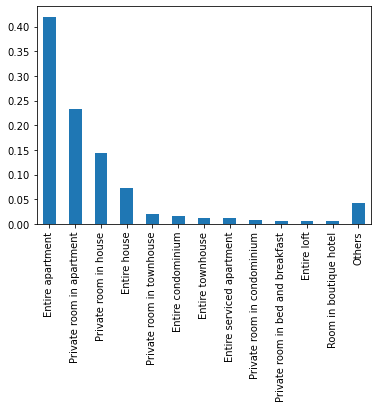

Property types: ['Entire apartment', 'Private room in apartment', 'Private room in house'] make up 79.75 % of the total property types


In [19]:
prob = listings['property_type'].value_counts(normalize=True)
# Setting a threshold. This threshold means that if the frequency of the property types that is less than this value, they will be categorised as 'Others'
threshold = 0.005
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['Others'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

print("Property types: {} make up {} % of the total property types".format(
    list(prob[:3].index), 
    round(prob[:3].sum(), 4) * 100
))

In [20]:
# Replace with Other if the frequency of the category is below set threshold (we set it at 0.005, refer to above) 
listings.loc[~listings['property_type'].isin(prob.index.drop('Others')), 'property_type'] = 'Others'
listings['property_type'].value_counts()

Entire apartment                     32299
Private room in apartment            17952
Private room in house                11136
Entire house                          5635
Others                                3283
Private room in townhouse             1552
Entire condominium                    1171
Entire townhouse                       976
Entire serviced apartment              966
Private room in condominium            622
Private room in bed and breakfast      524
Entire loft                            429
Room in boutique hotel                 428
Name: property_type, dtype: int64

# Bathrooms, bedrooms and beds
Since these are integer values, the missing values will be replaced with median

In [21]:
fill_median = lambda col: col.fillna(col.median())
listings[['bathrooms', 'bedrooms', 'beds']] = listings[['bathrooms', 'bedrooms', 'beds']].apply(fill_median)

listings[['bathrooms', 'bedrooms', 'beds']].isnull().sum()

bathrooms    0
bedrooms     0
beds         0
dtype: int64

# First_review and last_review
More than 28% of the listings do not have any reviews. This is too many rows to drop. Furthermore, inputing the missing values is also not the best idea since this may skew the distribution significantly. However, the fact that there are missing values may give us meaningful information. This explains that listings with missing values are new bookings that have not yet have reviews. Hence, these values will be kept and will be categorised as 'No reviews'. These columns will be transformed to categorical

In [22]:
listings[['first_review', 'last_review']].isnull().sum() / len(listings)

first_review    0.282255
last_review     0.282255
dtype: float64

In [23]:
# Convert to datetime object
listings['first_review'] = pd.to_datetime(listings['first_review'])
listings['last_review'] = pd.to_datetime(listings['last_review'])

# Calculate number of days between review date and the date the dataset was scrapped
listings['days_since_first_review'] = (listings['last_scraped'] - listings['first_review'])
listings['days_since_last_review'] = (listings['last_scraped'] - listings['last_review'])

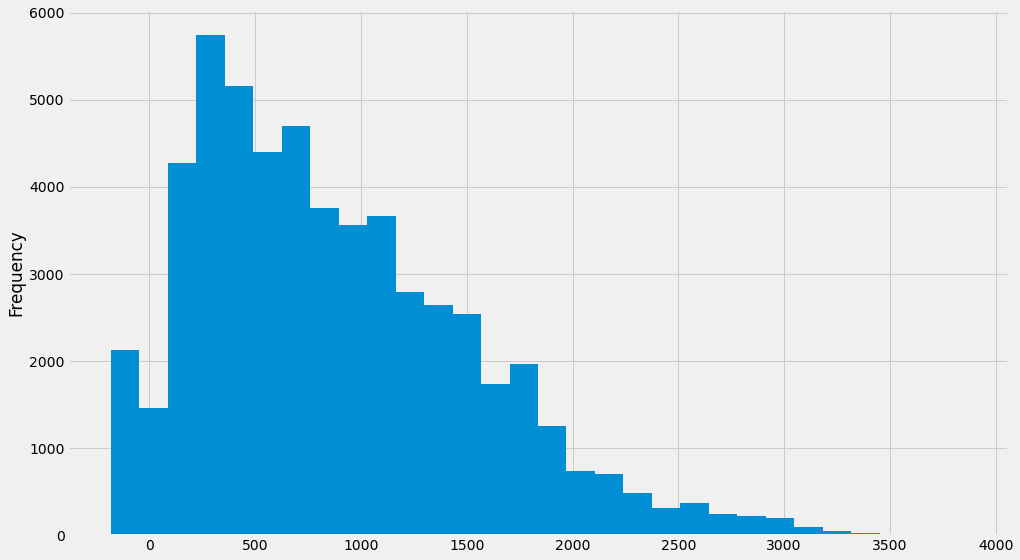

In [24]:
from datetime import datetime, timedelta

plt.style.use('fivethirtyeight')

listings['days_since_first_review'].dt.days.plot(kind='hist', bins=30, figsize=(15,9));
def categorise_col(col_name, new_col, bins, labels):
    listings[new_col] = pd.cut(listings[col_name], bins, labels=labels)
    listings[new_col] = listings[new_col].astype('str')
    listings[new_col] = listings[new_col].str.replace('nan', 'No reviews')
    listings[new_col] = listings[new_col].astype('category')
    
bins = pd.to_timedelta([0, 182, 365, 730, 1460, max(listings['days_since_first_review'])], unit='days')
labels = ['0-6 months',
           '6-12 months',
           '1-2 years',
           '2-3 years',
           '4+ years']
categorise_col('days_since_first_review', 'days_since_first_review_cats', bins, labels)

24546

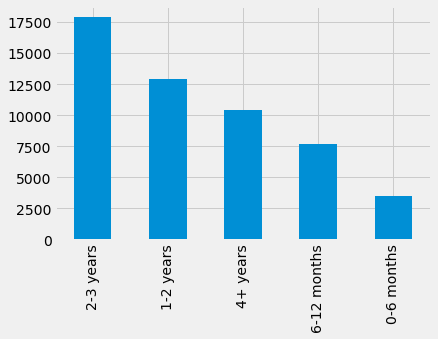

In [25]:
listings['days_since_first_review_cats'].value_counts().plot(kind='bar')
listings['days_since_first_review_cats'].isnull().sum()

In [26]:
listings['days_since_first_review_cats'].isnull().sum()

24546

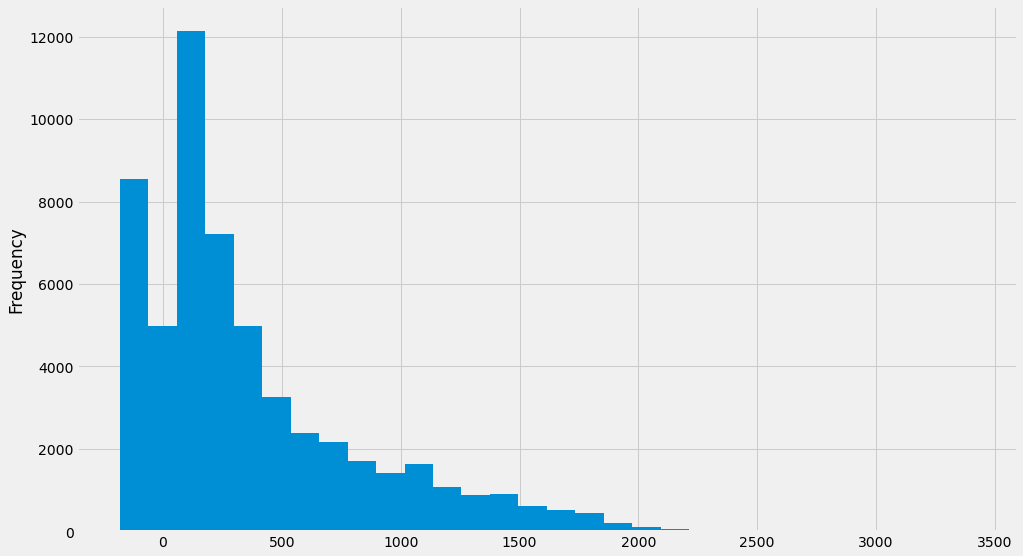

In [27]:
listings['days_since_last_review'].dt.days.plot(kind='hist', bins=30, figsize=(15,9));

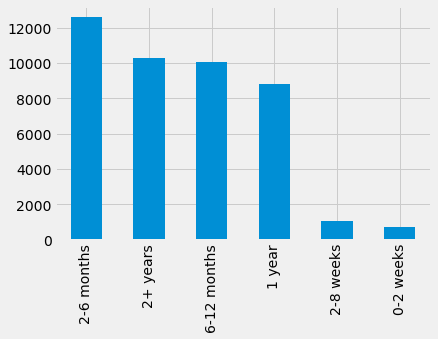

In [28]:
bins2 = pd.to_timedelta([0, 14, 60, 182, 365, 730, max(listings['days_since_last_review'])], unit='days')
labels2 = ['0-2 weeks', '2-8 weeks', '2-6 months', '6-12 months', '1 year', '2+ years']

categorise_col('days_since_last_review', 'days_since_last_review_cats', bins=bins2, labels=labels2)
listings['days_since_last_review_cats'].value_counts().plot(kind='bar');
listings['days_since_last_review_cats'].isnull().sum();

# # Storing the first_review column in a variable for Exploratory Data Analysis
# first_review = listings['first_review']
# review_scores_rating = listings['review_scores_rating']

# Review scores columns
Like above, ratings without reviews will be replaced by No reviews value, and we will also categorise these columns. The histrograms below will be a useful reference for us to decide on bins. Most of the ratings are above 9 points out of 10. reviews_scores_rating is a mean of other columns multiplied by 100 to represent the ratings in percentage.

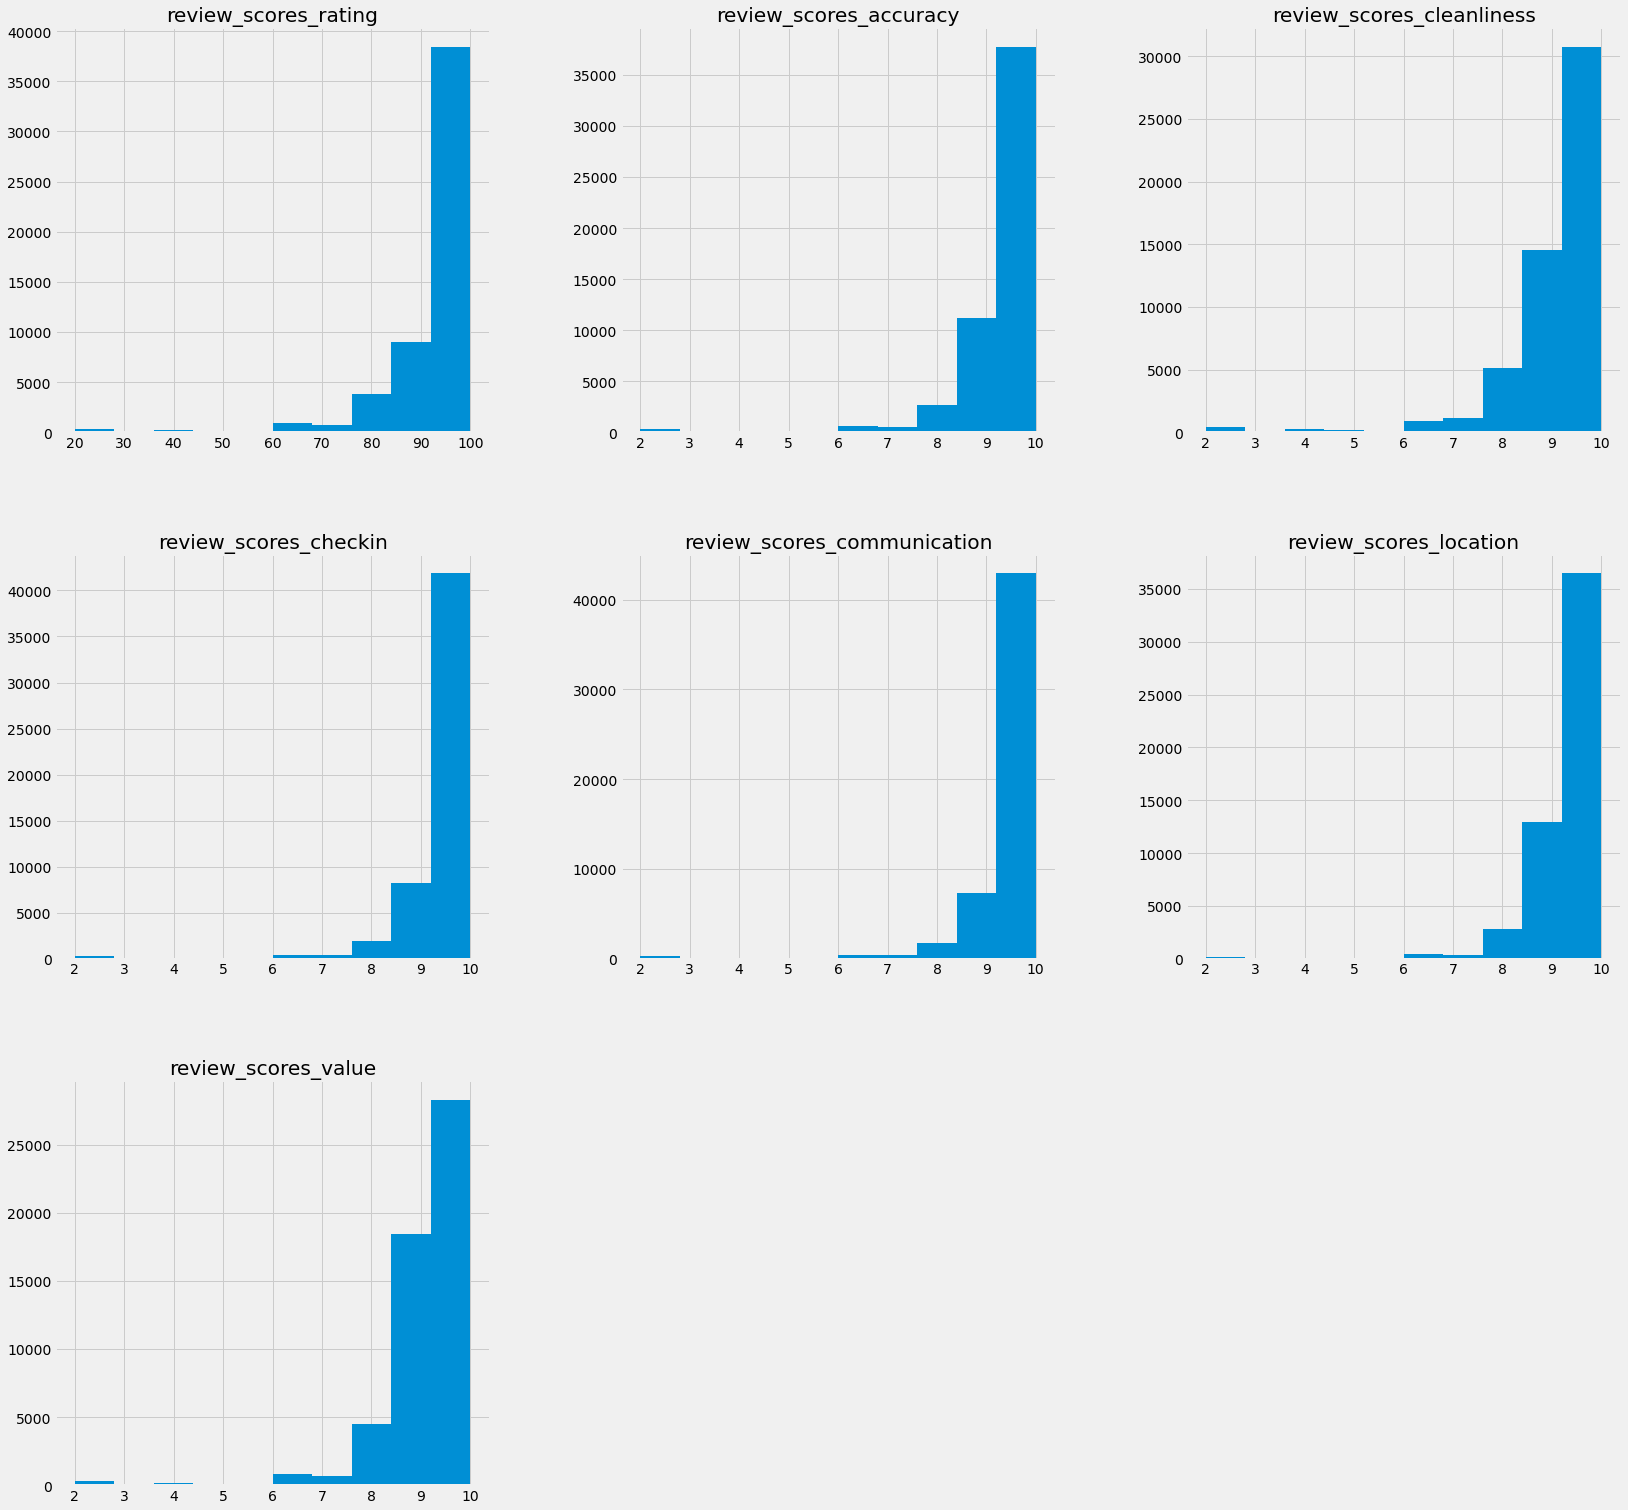

In [29]:
listings.isnull().sum().sort_values(ascending=False)
review_cols = listings.columns[listings.columns.str.startswith("review_scores")]
listings[review_cols].hist(figsize=(25, 25));

In [30]:
# Categorising columns out of 10
review_cols_10 = ['review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']
new_cols_10 = [s + "_cats" for s in review_cols_10]
bins3 = [0, 8, 9, 10]
labels3 = ['0-8/10', '9/10', '10/10']

for i, col in enumerate(review_cols_10):
    categorise_col(col, new_cols_10[i], bins=bins3, labels=labels3)

# Categorising column out of 10
categorise_col('review_scores_rating', 'review_scores_rating_cat', 
               bins=[0, 80, 95, 100], 
               labels=['0-79/100', '80-94/100', '95-100/100'])

# Dealing with outliers in prices
Around 1.7% of listings' prices are greater than 400. So we will remove the rows with values > 400

0.017226819793953723


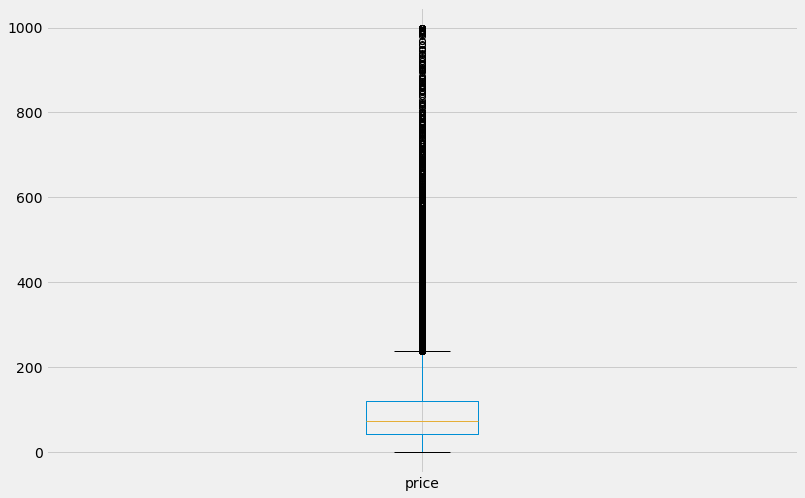

In [31]:
listings['price'].plot(kind='box', figsize=(12, 8));
print(len(listings[listings['price'] > 400]) / len(listings))

listings = listings[listings['price'] < 400]

In [44]:
listings['price'].describe()

count    75487.000000
mean        91.149880
std         68.038888
min          0.000000
25%         41.000000
50%         71.000000
75%        120.000000
max        399.000000
Name: price, dtype: float64

In [ ]:
listings['price']

mean: 91.14988011180733 median 71.0


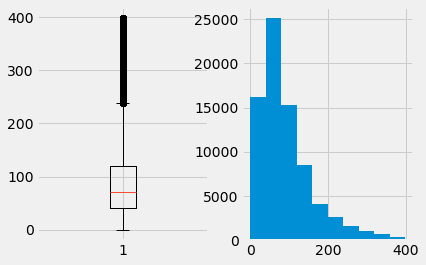

In [49]:
colToTest = "price" 

f, ax = plt.subplots(1, 2)
ax[0].boxplot(listings[colToTest])
ax[1].hist(listings[colToTest])

print('mean:', listings[colToTest].mean(),'median', listings[colToTest].median())
#print('std:', listings[colToTest].std(),'iqr', stats.iqr(listings[colToTest]))
#print('std:', listings[colToTest].std(),'mad', sm.robust.scale.mad(listings[colToTest]))

# Amenities
Given that amenities are stored in a list, we will split the amenities and one-hot encoding them

In [32]:
import time
import re

def one_hot_encode_amenities(df):
    '''
    INPUT: 
    df - Original dataframe
    OUTPUT: 
    df_amenities - One-hot encoded dataframe of amenities
    
    Create dummies from list of amenities
    
    '''
    

    def clean_amenities(row):
        '''
        Remove special characters and split the strings
        '''
        row = re.sub('[^A-Za-z,]+', '_', row).split(",")
        return row
    
    df['amenities'] = df['amenities'].apply(clean_amenities)
    # Create columns from list of amenities
    df_amenities = df.amenities.str.join('|').str.get_dummies().add_prefix('amenity')
    # Include only those amenities that are found in >5% of the listings
    df_amenities = df_amenities[df_amenities.columns[df_amenities.sum() > 0.05 * len(df_amenities)]]
    
    return df_amenities

start = time.time()
amenities_df = one_hot_encode_amenities(listings)

print(time.time() - start)

21.6868679523468


In [33]:
#Concatenate dataframes
listings = pd.concat([listings, amenities_df], axis=1)

In [34]:
listings.head()

,id,last_scraped,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,amenity_Dryer_,amenity_Elevator_,amenity_Essentials_,amenity_Extra_pillows_and_blankets_,amenity_Fire_extinguisher_,amenity_First_aid_kit_,amenity_Free_parking_on_premises_,amenity_Free_street_parking_,amenity_Garden_or_backyard_,amenity_Hair_dryer_,amenity_Hangers_,amenity_Heating_,amenity_Host_greets_you_,amenity_Hot_water_,amenity_Indoor_fireplace_,amenity_Iron_,amenity_Kitchen_,amenity_Laptop_friendly_workspace_,amenity_Lock_on_bedroom_door_,amenity_Lockbox_,amenity_Long_term_stays_allowed_,amenity_Luggage_dropoff_allowed_,amenity_Microwave_,amenity_Oven_,amenity_Paid_parking_off_premises_,amenity_Patio_or_balcony_,amenity_Private_entrance_,amenity_Private_living_room_,amenity_Refrigerator_,amenity_Shampoo_,amenity_Shower_gel_,amenity_Single_level_home_,amenity_Smoke_alarm_,amenity_Stove_,amenity_TV_,amenity_Washer_,amenity_Wifi_
0,11551,2020-07-11,43039,2009-03-10,100.0,100.0,0.0,3.0,3.0,1.0,1.0,Lambeth,51.46225,-0.11732,Entire apartment,Entire home/apt,4,1.0,1.0,3.0,"[_Cable_TV_, _Coffee_maker_, _Carbon_monoxide_...",97.0,7,190,0,0,4,279,192,7,0,2010-03-21,2020-03-26,91.0,9.0,9.0,10.0,...,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,1,1,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,1,1,1
1,13913,2020-07-11,54730,2009-11-16,83.0,71.0,0.0,3.0,3.0,1.0,1.0,Islington,51.56802,-0.11121,Private room in apartment,Private room,2,1.0,1.0,0.0,"[_Cable_TV_, _Bed_linens_, _Coffee_maker_, _Pa...",40.0,1,29,30,60,90,365,21,2,0,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,...,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,0,1,1,1,1,1
2,15400,2020-07-11,60302,2009-05-12,100.0,100.0,0.0,1.0,1.0,1.0,1.0,Kensington and Chelsea,51.48796,-0.16898,Entire apartment,Entire home/apt,2,1.0,1.0,1.0,"[_Cable_TV_, _Coffee_maker_, _Dryer_, _Dishes_...",75.0,10,50,0,20,50,150,89,1,0,2009-12-21,2020-03-16,96.0,10.0,10.0,10.0,...,1,0,1,0,1,0,0,0,0,1,1,1,0,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,0,0,1,0,1,1,1
3,17402,2020-06-11,67564,2010-04-01,67.0,100.0,1.0,18.0,18.0,1.0,1.0,Westminster,51.52195,-0.14094,Entire apartment,Entire home/apt,6,2.0,3.0,3.0,"[_Bed_linens_, _Coffee_maker_, _Dryer_, _Paid_...",307.0,4,365,25,55,85,330,42,0,0,2011-03-21,2019-02-11,94.0,10.0,9.0,9.0,...,1,1,1,0,0,0,0,0,0,1,1,1,0,1,0,1,1,1,0,1,1,0,1,1,1,0,0,0,1,1,0,0,1,1,1,1,1
4,17506,2020-07-11,67915,2010-05-01,NaN,NaN,0.0,3.0,3.0,1.0,1.0,Hammersmith and Fulham,51.47935,-0.19743,Private room in bed and breakfast,Private room,2,1.0,1.0,1.0,"[_TV_, _Heating_, _Shower_gel_, _Wifi_, _Smoke...",150.0,3,21,29,59,89,364,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1


# Host_response_rate, host_acceptance_rate, reviews_per_month
Empty host_response_rate, host_acceptance_rate, reviews_per_month will be filled by mean values

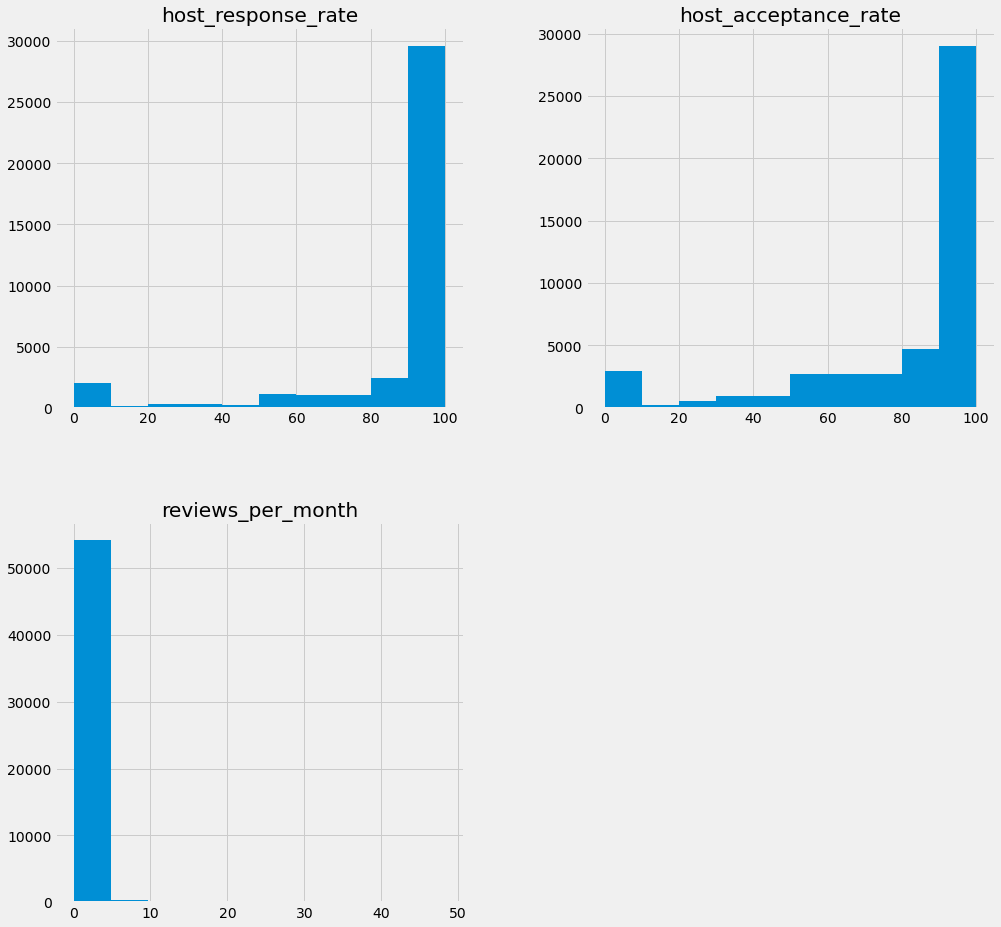

In [35]:
fill_mean = lambda col: col.fillna(col.mean())
listings[['host_response_rate', 'host_acceptance_rate', 'reviews_per_month']].hist(figsize=(15, 15));
listings[['host_response_rate', 'host_acceptance_rate', 'reviews_per_month']] = listings[['host_response_rate', 'host_acceptance_rate', 'reviews_per_month']].apply(fill_mean)

In [36]:
listings.head()

,id,last_scraped,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,amenity_Dryer_,amenity_Elevator_,amenity_Essentials_,amenity_Extra_pillows_and_blankets_,amenity_Fire_extinguisher_,amenity_First_aid_kit_,amenity_Free_parking_on_premises_,amenity_Free_street_parking_,amenity_Garden_or_backyard_,amenity_Hair_dryer_,amenity_Hangers_,amenity_Heating_,amenity_Host_greets_you_,amenity_Hot_water_,amenity_Indoor_fireplace_,amenity_Iron_,amenity_Kitchen_,amenity_Laptop_friendly_workspace_,amenity_Lock_on_bedroom_door_,amenity_Lockbox_,amenity_Long_term_stays_allowed_,amenity_Luggage_dropoff_allowed_,amenity_Microwave_,amenity_Oven_,amenity_Paid_parking_off_premises_,amenity_Patio_or_balcony_,amenity_Private_entrance_,amenity_Private_living_room_,amenity_Refrigerator_,amenity_Shampoo_,amenity_Shower_gel_,amenity_Single_level_home_,amenity_Smoke_alarm_,amenity_Stove_,amenity_TV_,amenity_Washer_,amenity_Wifi_
0,11551,2020-07-11,43039,2009-03-10,100.000000,100.000000,0.0,3.0,3.0,1.0,1.0,Lambeth,51.46225,-0.11732,Entire apartment,Entire home/apt,4,1.0,1.0,3.0,"[_Cable_TV_, _Coffee_maker_, _Carbon_monoxide_...",97.0,7,190,0,0,4,279,192,7,0,2010-03-21,2020-03-26,91.0,9.0,9.0,10.0,...,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,1,1,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,1,1,1
1,13913,2020-07-11,54730,2009-11-16,83.000000,71.000000,0.0,3.0,3.0,1.0,1.0,Islington,51.56802,-0.11121,Private room in apartment,Private room,2,1.0,1.0,0.0,"[_Cable_TV_, _Bed_linens_, _Coffee_maker_, _Pa...",40.0,1,29,30,60,90,365,21,2,0,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,...,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,0,1,1,1,1,1
2,15400,2020-07-11,60302,2009-05-12,100.000000,100.000000,0.0,1.0,1.0,1.0,1.0,Kensington and Chelsea,51.48796,-0.16898,Entire apartment,Entire home/apt,2,1.0,1.0,1.0,"[_Cable_TV_, _Coffee_maker_, _Dryer_, _Dishes_...",75.0,10,50,0,20,50,150,89,1,0,2009-12-21,2020-03-16,96.0,10.0,10.0,10.0,...,1,0,1,0,1,0,0,0,0,1,1,1,0,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,0,0,1,0,1,1,1
3,17402,2020-06-11,67564,2010-04-01,67.000000,100.000000,1.0,18.0,18.0,1.0,1.0,Westminster,51.52195,-0.14094,Entire apartment,Entire home/apt,6,2.0,3.0,3.0,"[_Bed_linens_, _Coffee_maker_, _Dryer_, _Paid_...",307.0,4,365,25,55,85,330,42,0,0,2011-03-21,2019-02-11,94.0,10.0,9.0,9.0,...,1,1,1,0,0,0,0,0,0,1,1,1,0,1,0,1,1,1,0,1,1,0,1,1,1,0,0,0,1,1,0,0,1,1,1,1,1
4,17506,2020-07-11,67915,2010-05-01,87.772666,81.321339,0.0,3.0,3.0,1.0,1.0,Hammersmith and Fulham,51.47935,-0.19743,Private room in bed and breakfast,Private room,2,1.0,1.0,1.0,"[_TV_, _Heating_, _Shower_gel_, _Wifi_, _Smoke...",150.0,3,21,29,59,89,364,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1


In [37]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
#import Data_cleaning as t

listings.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75487 entries, 0 to 76983
Data columns (total 104 columns):
 #    Column                                        Dtype          
---   ------                                        -----          
 0    id                                            int64          
 1    last_scraped                                  datetime64[ns] 
 2    host_id                                       int64          
 3    host_since                                    datetime64[ns] 
 4    host_response_rate                            float64        
 5    host_acceptance_rate                          float64        
 6    host_is_superhost                             float64        
 7    host_listings_count                           float64        
 8    host_total_listings_count                     float64        
 9    host_has_profile_pic                          float64        
 10   host_identity_verified                        float64        
 11   

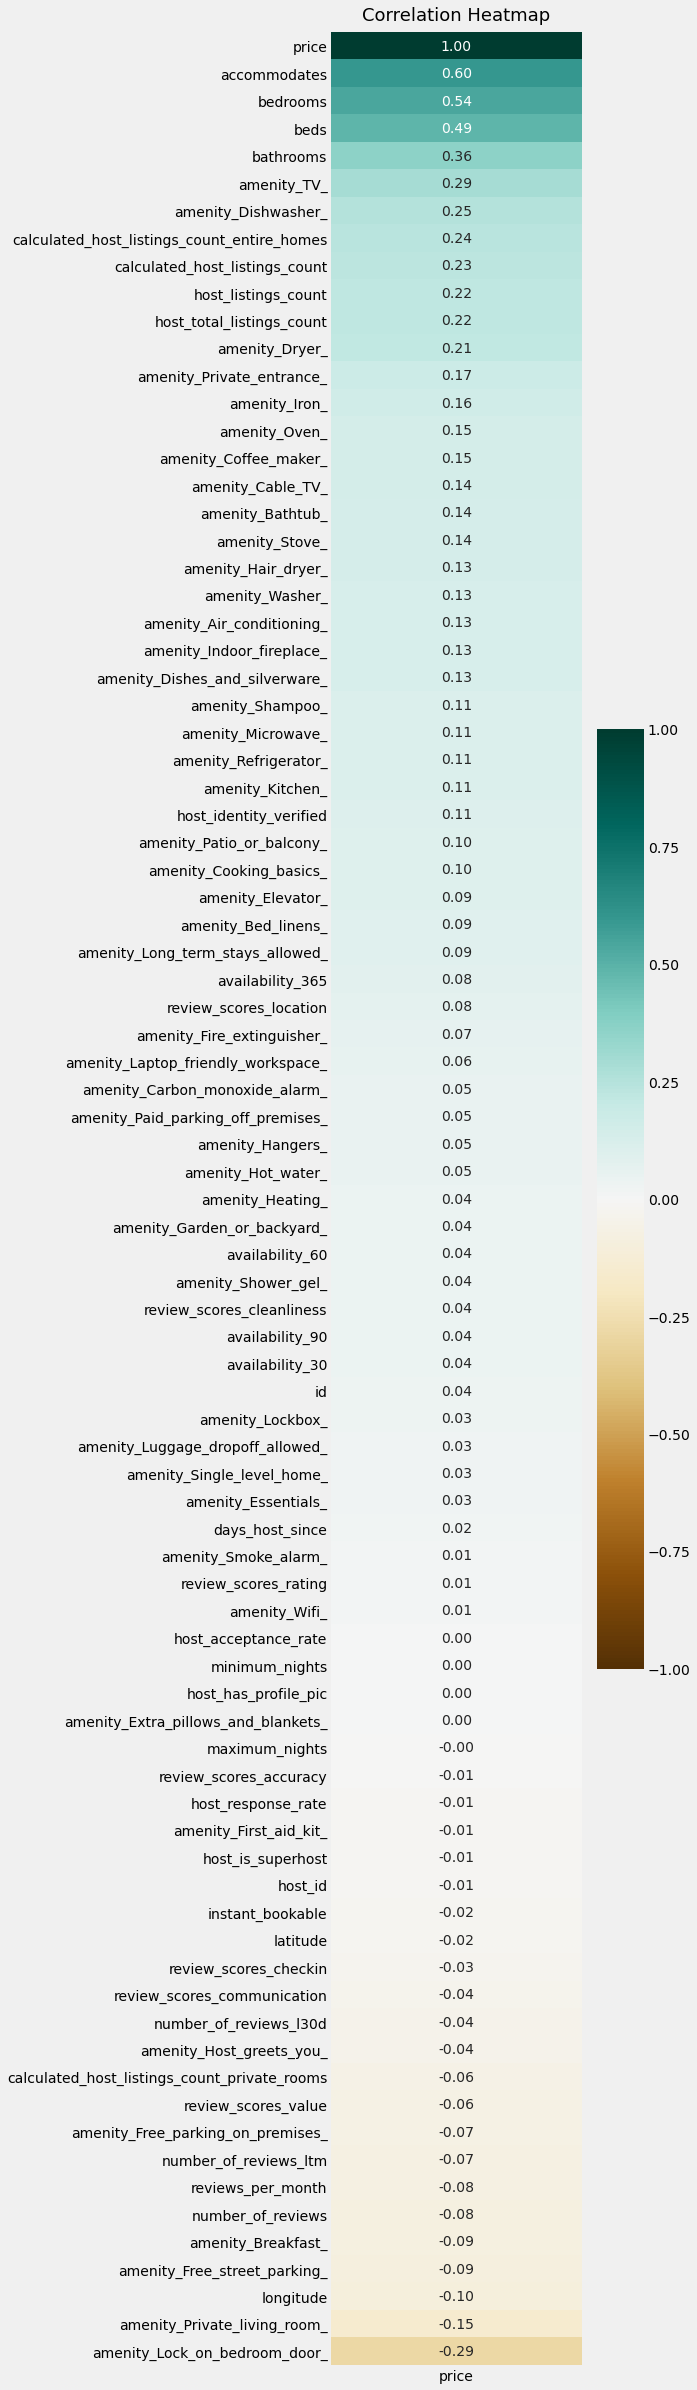

In [38]:
plt.figure(figsize=(5, 40))
feature_correlation = listings.corr()[['price']].sort_values(by='price', ascending=False)
# feature_correlation = feature_correlation[(feature_correlation > 0.1) & (feature_correlation != 1)]
# Show all features.
# heatmap = sns.heatmap(feature_correlation, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='BrBG')

# Show only price feature
heatmap = sns.heatmap(feature_correlation, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

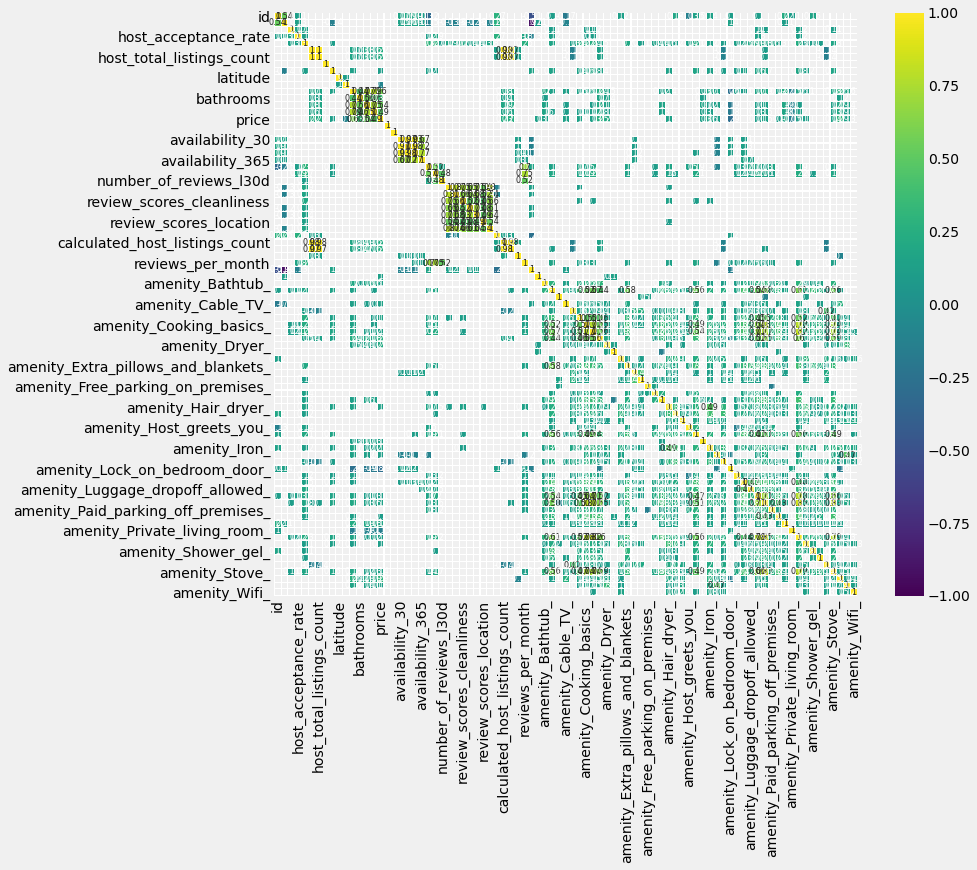

In [39]:
corr = listings.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [114]:
corr = corr.sort_values(by='price',ascending=False)

print(corr['price'].head(20))

price                                          1.000000
accommodates                                   0.599072
bedrooms                                       0.544946
beds                                           0.485285
bathrooms                                      0.363741
amenity_TV_                                    0.291798
amenity_Dishwasher_                            0.254821
calculated_host_listings_count_entire_homes    0.241400
calculated_host_listings_count                 0.227365
host_total_listings_count                      0.219070
host_listings_count                            0.219070
amenity_Dryer_                                 0.213041
amenity_Private_entrance_                      0.172029
amenity_Iron_                                  0.160199
amenity_Oven_                                  0.146832
amenity_Coffee_maker_                          0.145440
amenity_Cable_TV_                              0.141061
amenity_Bathtub_                               0

# Analysis:

Defying our expectations, we can see that the reviews have very little correlation to the price. The features that are strongly related are how many people can the listing accommodates, number of bedrooms, beds, etc